数据挖掘互评作业三：分类、预测与聚类
姓名：黄贵宸
学号：3220200892
github地址:

# 实验方法与结果

*  数据说明：选取的数据集为 
    [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews)
* 前期的数据读入及数据的基础分析：

In [1]:
import pandas as pd
import numpy as np

data_path = 'E:/桌面/dataMining/second/winemag-data_first150k.csv'
data = pd.read_csv(data_path)
data.shape
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   39241 non-null  int64  
 1   country      39241 non-null  object 
 2   description  39241 non-null  object 
 3   designation  39241 non-null  object 
 4   points       39241 non-null  int64  
 5   price        39241 non-null  float64
 6   province     39241 non-null  object 
 7   region_1     39241 non-null  object 
 8   region_2     39241 non-null  object 
 9   variety      39241 non-null  object 
 10  winery       39241 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.8+ MB


In [6]:
#对空值数据进行处理
print(data.isnull().sum()[data.isnull().sum()!=0]) #经过统计没有空值数据

Series([], dtype: int64)
[96, 65.0, 'Oregon', 'Pinot Noir']


##  一.对数据集进行处理，转换成适合进行关联规则挖掘的形式

### 1.1 概述
我们只保留红酒的分数，地区，分数，葡萄品种四个属性，作为挖掘关联规则的属性。

### 1.2 实现方法

In [ ]:
语言：python
结果：TXT
依赖包：pandas， numpy

### 1.3 具体实现

In [46]:
# 对数据进行处理
normData = data.drop(["Unnamed: 0","description","designation","country","region_1","region_2","winery"], axis = 1)
normData1 = normData.drop(normData[normData["variety"] != "Pinot Noir"].index)
normData2 = normData.drop(normData[normData["variety"] != "Chardonnay"].index)
normData3 = normData.drop(normData[normData["variety"] != "Cabernet Sauvignon"].index)
normData4 = normData.drop(normData[normData["variety"] != "Red Blend"].index)
normData = pd.concat([normData1,normData2,normData3,normData4])
normData.to_csv("normData.csv",index=False,sep=',')
wineList = normData.values.tolist()

print(wineList[0])

[96, 65.0, 'Oregon', 'Pinot Noir']


我们将前几个样本打印出来为例，第一个属性是红酒的分数，第二个属性是红酒的价格，第三个属性是红酒所在的地区，第四个属性代表酿红酒的葡萄品类。

In [47]:
#五数概括
def checkFiveNumbers(data, attr):
    fiveNumbers = {}
    fiveNumbers["Min"] = data[attr].min()
    fiveNumbers["Q1"] = data[attr].quantile(q=0.25)
    fiveNumbers["Median"] = data[attr].median()
    fiveNumbers["Q3"] = data[attr].quantile(q=0.75)
    fiveNumbers["Max"] = data[attr].max()
    return fiveNumbers

#将数据按五数概括分类
def replaceFiveNumbers(wineList, fiveNumbers, index, category):
    for i in range(len(wineList)):
        temp = wineList[i][index]
        wineList[i][index] = category + '_4'
        if temp > fiveNumbers['Q1']:
            wineList[i][index] = category + '_3'
        elif temp > fiveNumbers['Median']:
            wineList[i][index] = category + '_2'
        elif  temp > fiveNumbers['Q3']:
            wineList[i][index] = category + '_1'
    return wineList

points5Numbers = checkFiveNumbers(normData, "points")
price5Numbers = checkFiveNumbers(normData, "price")
print("points的五数概括：", points5Numbers)
print("price的五数概括：", price5Numbers)
wineList = replaceFiveNumbers(wineList, points5Numbers, 0 , 'points')
wineList = replaceFiveNumbers(wineList, price5Numbers, 1 , 'price')
print(wineList[0])

points的五数概括： {'Min': 80, 'Q1': 87.0, 'Median': 89.0, 'Q3': 92.0, 'Max': 100}
price的五数概括： {'Min': 4.0, 'Q1': 26.0, 'Median': 40.0, 'Q3': 52.0, 'Max': 2013.0}
['points_3', 'price_3', 'Oregon', 'Pinot Noir']


具体而言，我们将红酒的价格和分数通过五数概括，替换为红酒列表的值,举例来说，我们比分数_Q1小的赋予price_4,以五数为标准，更新列表数据。最后将数据变为['points_3', 'price_3', 'Oregon', 'Pinot Noir']的格式

##  二.找出频繁模式

### 1.1 概述
我们用红酒的分数，地区，分数，葡萄品种四个属性，挖掘频繁模式。导出关联规则，计算其支持度和置信度。对规则进行评价，使用Lift、卡方。

### 1.2 实现方法

In [ ]:
语言：python
结果：TXT
依赖包：pandas， mlxtend

### 1.3 具体实现

In [49]:
from mlxtend.preprocessing import TransactionEncoder
trans_encoder = TransactionEncoder() 
trans_encoder_matrix = trans_encoder.fit(wineList).transform(wineList)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns = trans_encoder.columns_)
print("\n")
print(trans_encoder_matrix.head())



   Cabernet Sauvignon  California  Chardonnay  New York  Oregon  Pinot Noir  \
0               False       False       False     False    True        True   
1               False       False       False     False    True        True   
2               False        True       False     False   False        True   
3               False       False       False     False    True        True   
4               False       False       False     False    True        True   

   Red Blend  Washington  points_3  points_4  price_3  price_4  
0      False       False      True     False     True    False  
1      False       False      True     False     True    False  
2      False       False      True     False     True    False  
3      False       False      True     False     True    False  
4      False       False      True     False     True    False  


我们通过 mlxtend.preprocessin的TransactionEncoder包，找出了数据的频繁关系。

执行apriori算法，结果已保存至frequent_itemset_apriori.csv


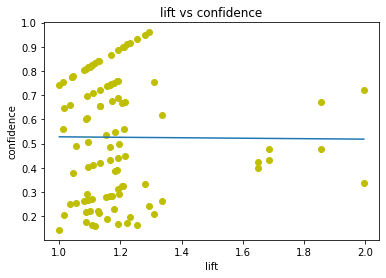

执行fpgrowth算法，结果已保存至frequent_itemset_fpgrowth.csv


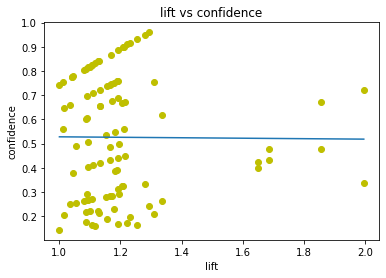

In [54]:
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

def plot_metrics_relationship(rule_matrix, col1, col2):
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))
    plt.show()

def generateFrequentItemsets(transact_items_matrix, rule_type, min_support):
    start_time = 0
    total_time = 0
    if rule_type == "apriori":
        frequent_itemsets=apriori(trans_encoder_matrix, min_support, use_colnames=True)
        total_time = time.time() - start_time
    elif rule_type == "fpgrowth":
        frequent_itemsets=fpgrowth(trans_encoder_matrix, min_support, use_colnames=True)
        total_time = time.time() - start_time
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets.to_csv('frequent_itemset_{}.csv'.format(rule_type))
    print("执行{}算法，结果已保存至frequent_itemset_{}.csv".format(rule_type, rule_type))
    return frequent_itemsets, total_time

# Apriori算法
itemsets_apriori, time_apriori = generateFrequentItemsets(trans_encoder_matrix, "apriori", min_support=0.1)
apriori_rules_lift = association_rules(itemsets_apriori, metric="lift", min_threshold=1)
apriori_rules_lift = apriori_rules_lift.sort_values(by='lift', ascending=False)
apriori_rules_lift.to_csv("apriori_rules_lift.csv")
apriori_rules_confidence = association_rules(itemsets_apriori, metric="confidence", min_threshold=0.2)
apriori_rules_confidence = apriori_rules_confidence.sort_values(by='confidence', ascending=False)
apriori_rules_confidence.to_csv("apriori_rules_confidence.csv")
plot_metrics_relationship(apriori_rules_lift, col1='lift', col2='confidence')

# Fp Growth算法
itemsets_fpgrowth, time_fpgrowth =  generateFrequentItemsets(trans_encoder_matrix, "fpgrowth", min_support=0.1)
fpgrowth_rules_lift = association_rules(itemsets_fpgrowth, metric="lift", min_threshold=1)
fpgrowth_rules_lift = fpgrowth_rules_lift.sort_values(by='lift', ascending=False)
fpgrowth_rules_lift.to_csv("fpgrowth_rules_lift.csv")
fpgrowth_rules_confidence = association_rules(itemsets_fpgrowth, metric="confidence", min_threshold=0.2)
fpgrowth_rules_confidence = fpgrowth_rules_confidence.sort_values(by='confidence', ascending=False)
fpgrowth_rules_confidence.to_csv("fpgrowth_rules_confidence.csv")
plot_metrics_relationship(fpgrowth_rules_lift, col1='lift', col2='confidence')

图片为两种关联算法的Lift评价，数据的支持度置信度导出为csv文件。